# DTMF(Dual Tone Multi-Frequency)

### DTMF톤 : 전화기의 버튼을 누를 때 발생하는 소리

## 표 1.1 : DTMF 키패드 주파수
| -------- | -------- | -------- | -------- | -------- |
| 주파수    | 1209 Hz  | 1336 Hz  | 1477 Hz  | 1633 Hz  |
| 697 Hz   | 1        | 2        | 3        | A        |
| 770 Hz   | 4        | 5        | 6        | B        |
| 852 Hz   | 7        | 8        | 9        | C        |
| 941 Hz   | *        | 0        | #        | D        |

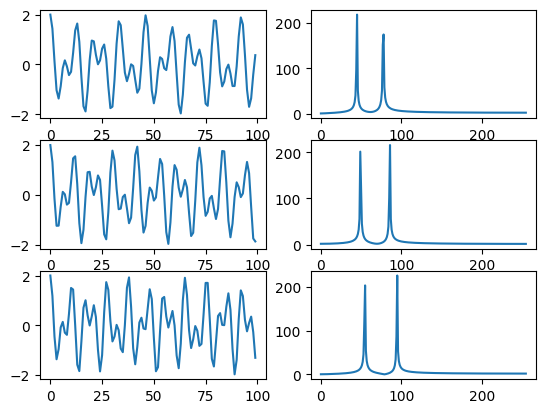

In [18]:
import numpy
import matplotlib.pyplot
import numpy.fft

'''Const'''
DTMF_KEYPAD = {'1':[697, 1209],'2':[697, 1336],'3':[697, 1477],'A':[697, 1633],
               '4':[770, 1209],'5':[770, 1336],'6':[770, 1477],'B':[770, 1633],
               '7':[852, 1209],'8':[852, 1336],'9':[852, 1477],'C':[852, 1633],
               '*':[941, 1209],'0':[941, 1336],'#':[941, 1477],'D':[941, 1633]}

'''Function'''
def getTimeDomainDTMF(c: str):
    n = numpy.linspace(0, 512/8000, 512)
    return numpy.cos(DTMF_KEYPAD[c[0]][0]*2*numpy.pi*n) + numpy.cos(DTMF_KEYPAD[c[0]][1]*2*numpy.pi*n)

def getDTMF(c: str):
    return numpy.fft.rfft(getTimeDomainDTMF(c[0]))

'''Main'''
if __name__ == '__main__':
    matplotlib.pyplot.subplot(321); matplotlib.pyplot.plot(getTimeDomainDTMF('1')[0:100])
    matplotlib.pyplot.subplot(322); matplotlib.pyplot.plot(abs(getDTMF('1'))[0:256])
    matplotlib.pyplot.subplot(323); matplotlib.pyplot.plot(getTimeDomainDTMF('5')[0:100])
    matplotlib.pyplot.subplot(324); matplotlib.pyplot.plot(abs(getDTMF('5'))[0:256])
    matplotlib.pyplot.subplot(325); matplotlib.pyplot.plot(getTimeDomainDTMF('9')[0:100])
    matplotlib.pyplot.subplot(326); matplotlib.pyplot.plot(abs(getDTMF('9'))[0:256])
    matplotlib.pyplot.show()

# 실습-고조파(Harmonics) 정현파의 합

Text(0, 0.5, 'x3(t)')

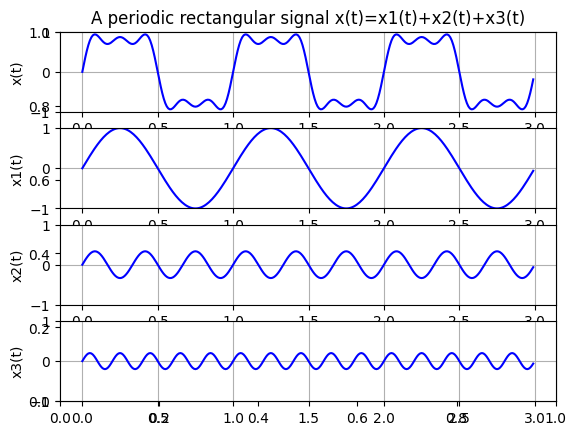

In [20]:
import numpy
import matplotlib.pyplot

f_s = 100
t_s = 1/f_s
n_s = 300
# x(time)
x_0 = numpy.arange(0, n_s) * t_s
# y(size)
y_1_t = 1.0*numpy.sin(2*numpy.pi*1*x_0) # size:1, frq:1Hz, T0:1sec
y_2_t = 1/3*numpy.sin(2*numpy.pi*3*x_0) # size:1/3, frq:3Hz, T0:1/3sec
y_3_t = 1/5*numpy.sin(2*numpy.pi*5*x_0) # size:1/5, frq:5Hz, T0:1/5sec

y_0_t = y_1_t + y_2_t + y_3_t
# draw
matplotlib.pyplot.title('A periodic rectangular signal x(t)=x1(t)+x2(t)+x3(t)')
matplotlib.pyplot.subplot(4, 1, 1); matplotlib.pyplot.plot(x_0, y_0_t, 'b'); matplotlib.pyplot.ylim(-1, 1); matplotlib.pyplot.grid()
matplotlib.pyplot.ylabel('x(t)')
matplotlib.pyplot.subplot(4, 1, 2); matplotlib.pyplot.plot(x_0, y_1_t, 'b'); matplotlib.pyplot.ylim(-1, 1); matplotlib.pyplot.grid()
matplotlib.pyplot.ylabel('x1(t)')
matplotlib.pyplot.subplot(4, 1, 3); matplotlib.pyplot.plot(x_0, y_2_t, 'b'); matplotlib.pyplot.ylim(-1, 1); matplotlib.pyplot.grid()
matplotlib.pyplot.ylabel('x2(t)')
matplotlib.pyplot.subplot(4, 1, 4); matplotlib.pyplot.plot(x_0, y_3_t, 'b'); matplotlib.pyplot.ylim(-1, 1); matplotlib.pyplot.grid()
matplotlib.pyplot.ylabel('x3(t)')

# 정현파의 샘플링